# Supervised Learning - Foundations Project: ReCell 

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Loading the dataset

## Data Overview

- Observations
- Sanity checks

In [2]:
data = pd.read_csv("used_device_data.csv")

data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

In [3]:
# Checking the number of rows and columns in the data
print(f'The dataset has {data.shape[0]} rows and {data.shape[1]} columns')

The dataset has 3454 rows and 15 columns


In [4]:
# Checking the data types of the columns for the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

Obseravations:
* The DataFrame comprises 3,454 records with 15 features detailing smartphone specifications and pricing.
* Missing values are present in columns like main_camera_mp, selfie_camera_mp, int_memory, ram, battery, and weight.
* Data types:
   - Categorical features: brand_name, os, 4g, 5g.
   - Numerical features: screen_size, main_camera_mp, selfie_camera_mp, int_memory, ram, battery, weight, release_year, days_used, normalized_used_price, normalized_new_price.

In [5]:
# Statistical summary of the dataset
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0


Observations:
* There are 34 unique brands with "Others" being the most common.
* The majority of phones operate on the "Android" OS.
* Most phones support 4G, but not 5G.
* The average screen size is approximately 13.71 units.
* Phones typically have around 9.46 MP for the main camera and 6.55 MP for the selfie camera.
* On average, phones come with about 54.57 units of internal memory and 4.04 units of RAM.
* The dataset primarily includes phones released around the year 2015.
* Phones have an average used price and new price of 4.36 and 5.23 in normalized units, respectively

In [6]:
# Checking for duplicate values
data.duplicated().sum()

0

In [7]:
# Checking for missing values
data.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

#### Missing value treatment
We will impute the missing values in the data by the column medians grouped by `release_year` and `brand_name`.

In [8]:
# let's create a copy of the data
df = data.copy()

In [9]:
# Checking for missing values
df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

Observation: main_camera_mp, selfie_camera_mp, int_memory, ram, battery, and weight all have missing values

In [10]:
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]

for col in cols_impute:
    df[col] = df[col].fillna(
        value=df.groupby(['release_year'])[col].transform("median")
    )

# checking for missing values
df.isnull().sum()


brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

- We will impute the remaining missing values in the data by the column medians grouped by `brand_name`.

In [11]:
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "battery",
    "weight",
]

for col in cols_impute:
    df[col] = df[col].fillna(
        value=df.groupby(['brand_name'])[col].transform("median")
    )

# checking for missing values
df.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

- We will fill the remaining missing values in the `main_camera_mp` column by the column median.

In [12]:
df["main_camera_mp"] = df["main_camera_mp"].fillna(df["main_camera_mp"].median())

# Checking for missing values
df.isnull().sum()


brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

### Feature Engineering

- Let's create a new column `years_since_release` from the `release_year` column.
- We will consider the year of data collection, 2021, as the baseline.
- We will drop the `release_year` column.

In [13]:
df["years_since_release"] = 2021 - df["release_year"]
df.drop("release_year", axis=1, inplace=True)
df["years_since_release"].describe()

count    3454.000000
mean        5.034742
std         2.298455
min         1.000000
25%         3.000000
50%         5.500000
75%         7.000000
max         8.000000
Name: years_since_release, dtype: float64

### Outlier Check

- Let's check for outliers in the data.

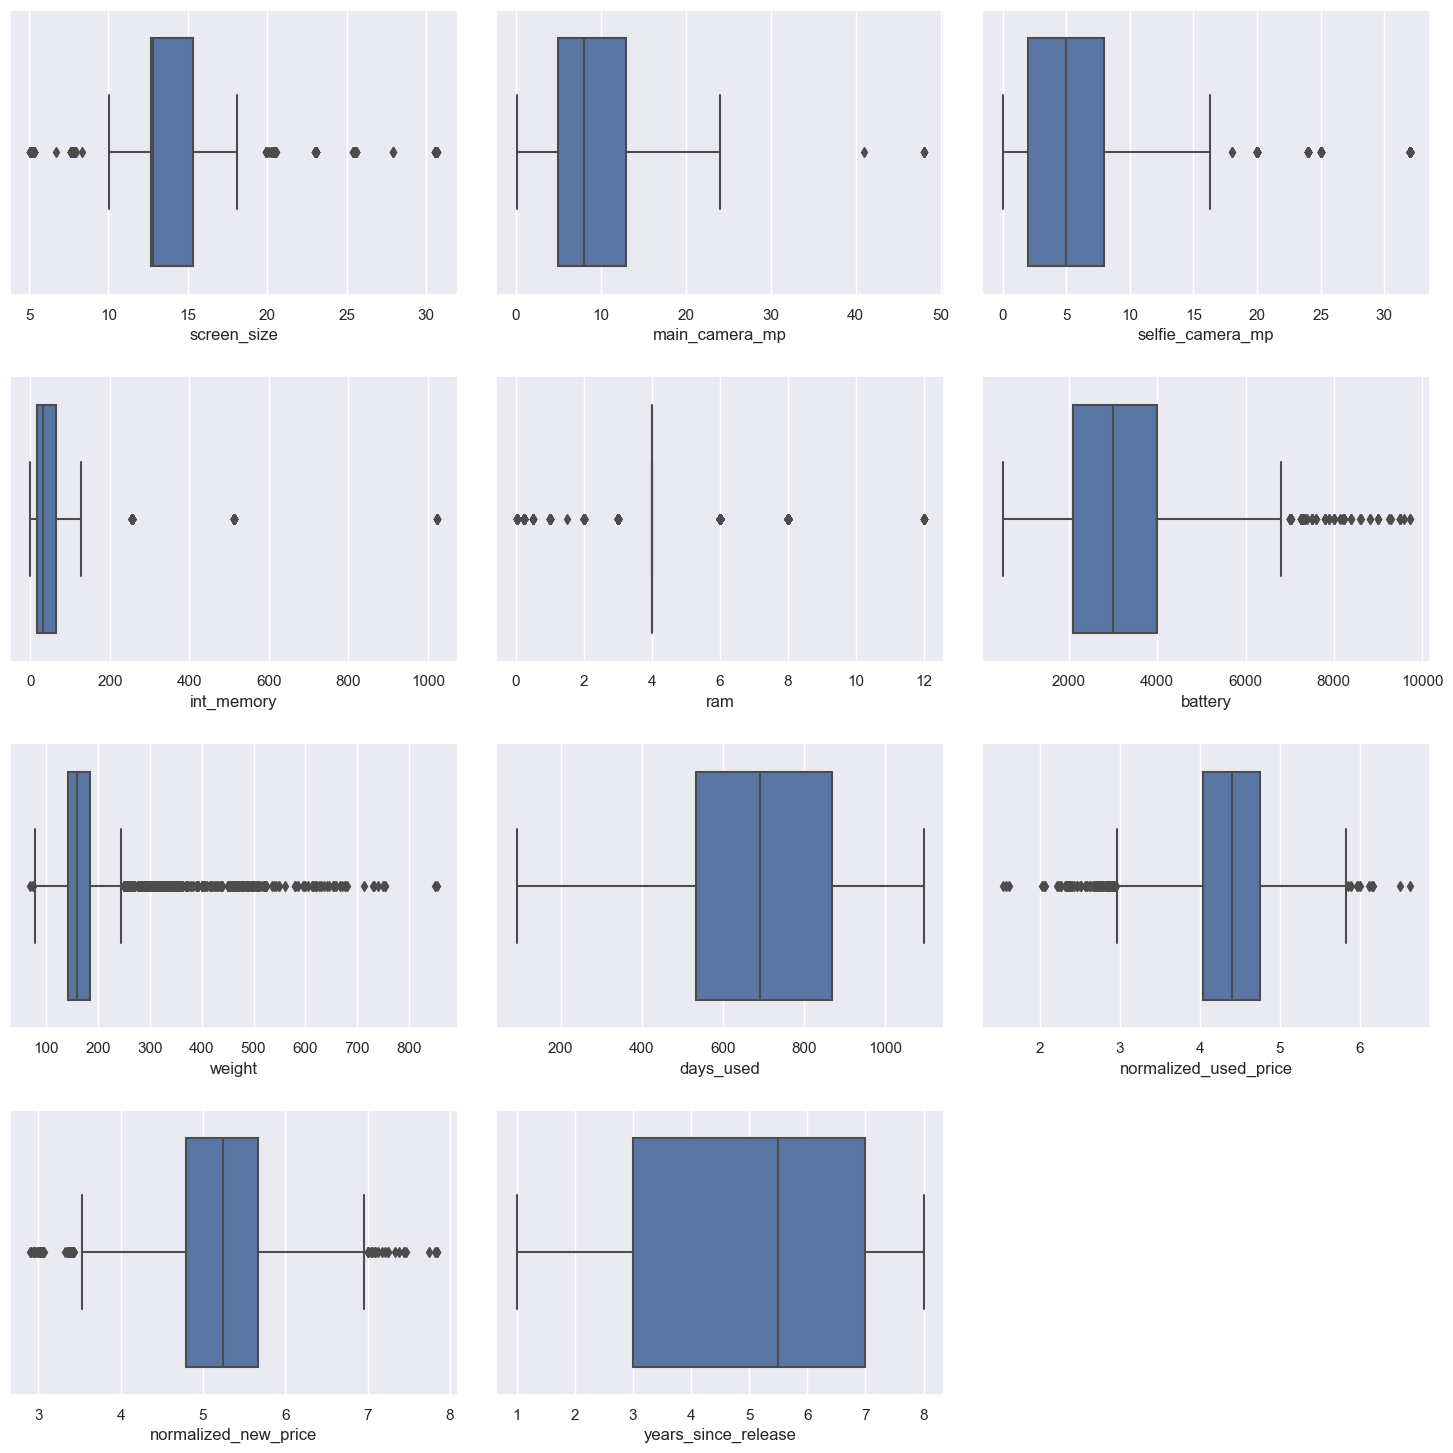

In [14]:
# outlier detection using boxplot
num_cols = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df, x=variable)
    plt.tight_layout(pad=2)

plt.show()

### Data Preparation for modeling

- We want to predict the normalized price of used devices
- Before we proceed to build a model, we'll have to encode categorical features
- We'll split the data into train and test to be able to evaluate the model that we build on the train data
- We will build a Linear Regression model using the train data and then check it's performance

In [15]:
X = df.drop('normalized_used_price', axis=1)
y = df['normalized_used_price']

print(X.head())
print()
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  days_used  \
0               5.0        64.0  3.0   3020.0   146.0        127   
1              16.0       128.0  8.0   4300.0   213.0        325   
2               8.0       128.0  8.0   4200.0   213.0        162   
3               8.0        64.0  6.0   7250.0   480.0        345   
4               8.0        64.0  3.0   5000.0   185.0        293   

   normalized_new_price  years_since_release  
0              4.715100                    1  
1              5.519018                    1  
2              5.884631                    1  
3              5.6

In [16]:
# let's add the intercept to data
X = sm.add_constant(X)

In [17]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True
)

X.head()


,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,...,0,0,0,0,0,0,0,0,1,0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,...,0,0,0,0,0,0,0,0,1,1
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,...,0,0,0,0,0,0,0,0,1,1
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,...,0,0,0,0,0,0,0,0,1,1
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,...,0,0,0,0,0,0,0,0,1,0


In [18]:
# splitting the data in 70:30 ratio for train to test data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## EDA

- It is a good idea to explore the data once again after manipulating it.

### Univariate Analysis

In [19]:
# function to plot a boxplot and a histogram along the same scale.
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram


# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
screen_size,3454.0,13.713115,3.805280,5.080000,12.700000,12.830000,15.340000,30.710000
main_camera_mp,3454.0,9.456624,4.712036,0.080000,5.000000,8.000000,13.000000,48.000000
selfie_camera_mp,3454.0,6.555067,6.968440,0.000000,2.000000,5.000000,8.000000,32.000000
int_memory,3454.0,54.560854,84.926848,0.010000,16.000000,32.000000,64.000000,1024.000000
ram,3454.0,4.037238,1.365132,0.020000,4.000000,4.000000,4.000000,12.000000
battery,3454.0,3132.186595,1298.991203,500.000000,2100.000000,3000.000000,4000.000000,9720.000000
weight,3454.0,182.691575,88.333703,69.000000,142.000000,160.000000,185.000000,855.000000
days_used,3454.0,674.869716,248.580166,91.000000,533.500000,690.500000,868.750000,1094.000000
normalized_used_price,3454.0,4.364712,0.588914,1.536867,4.033931,4.405133,4.755700,6.619433
normalized_new_price,3454.0,5.233107,0.683637,2.901422,4.790342,5.245892,5.673718,7.847841


**`normalized_used_price`**

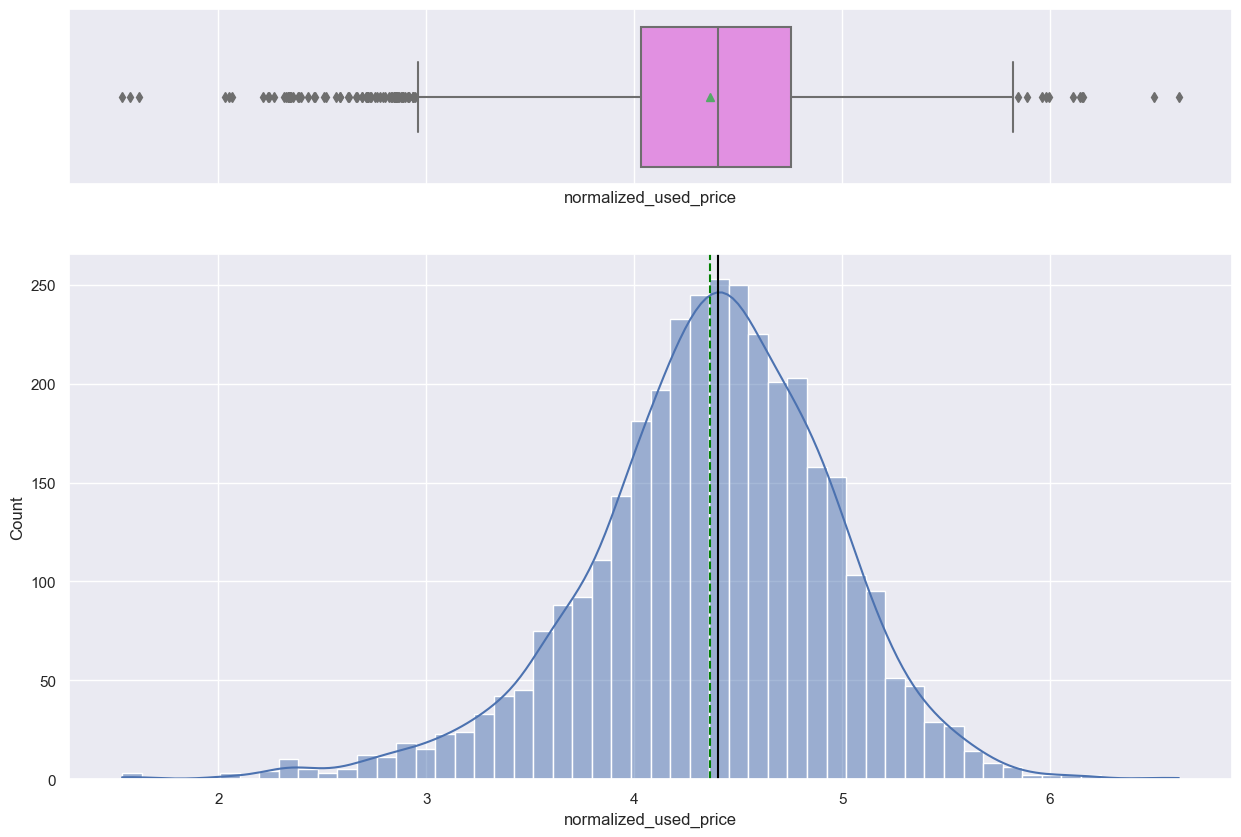

In [21]:
histogram_boxplot(df, "normalized_used_price", kde=True)

**`normalized_new_price`**

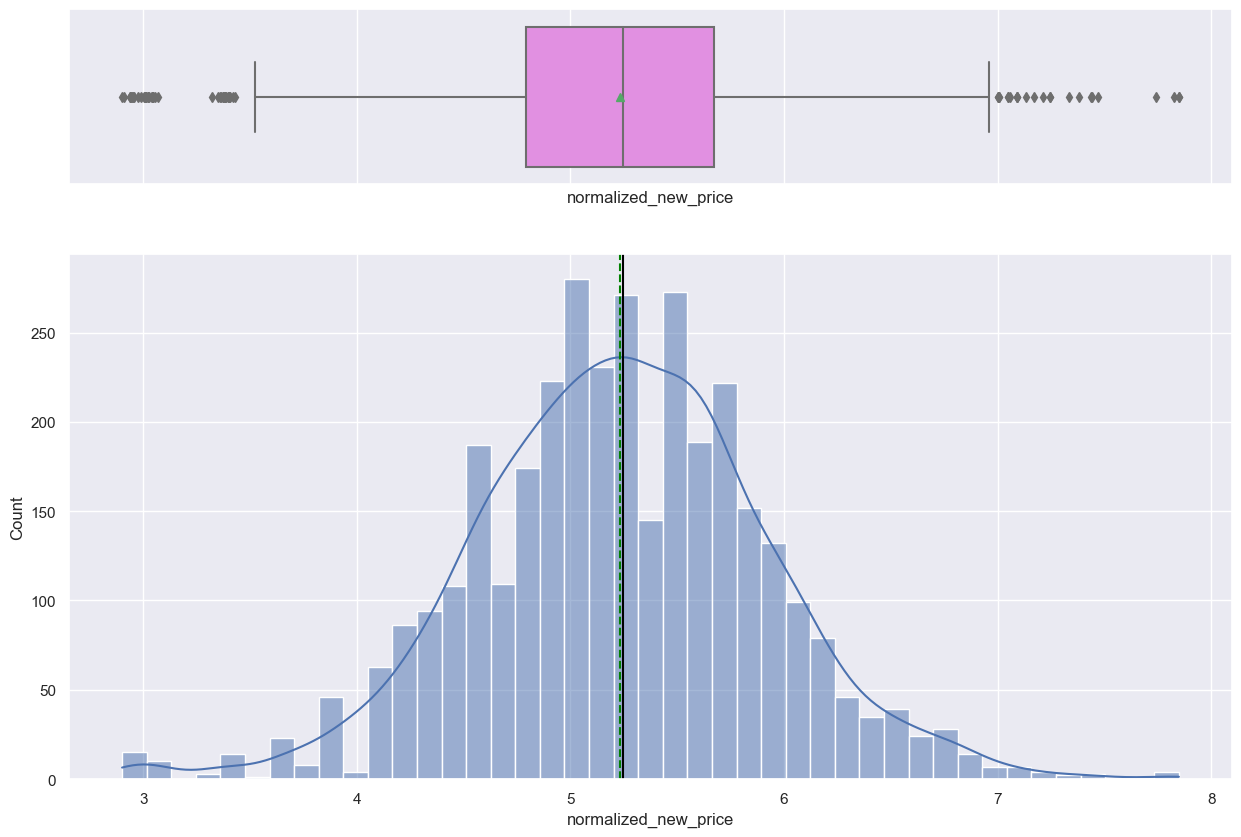

In [22]:
histogram_boxplot(df, 'normalized_new_price', kde=True) 

**`screen_size`**

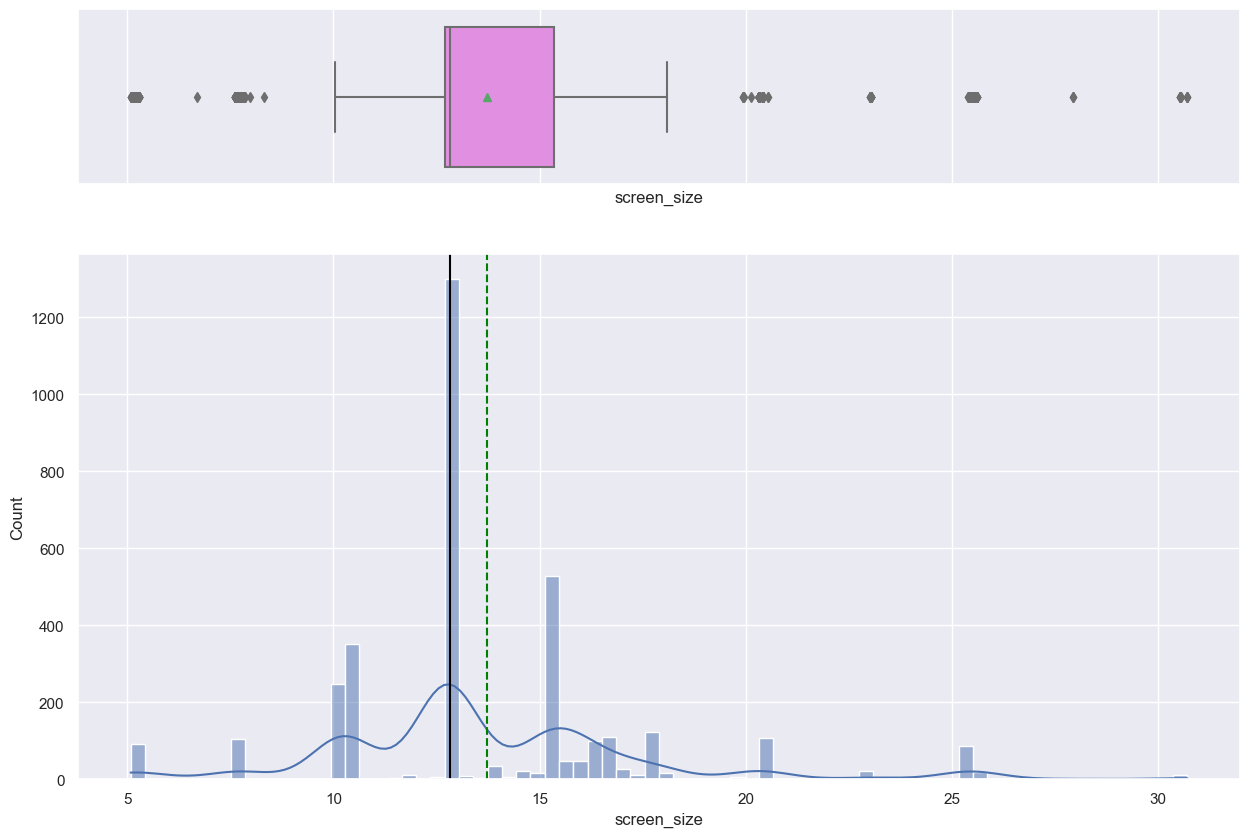

In [23]:
histogram_boxplot(df, 'screen_size', kde=True)

**`main_camera_mp`**

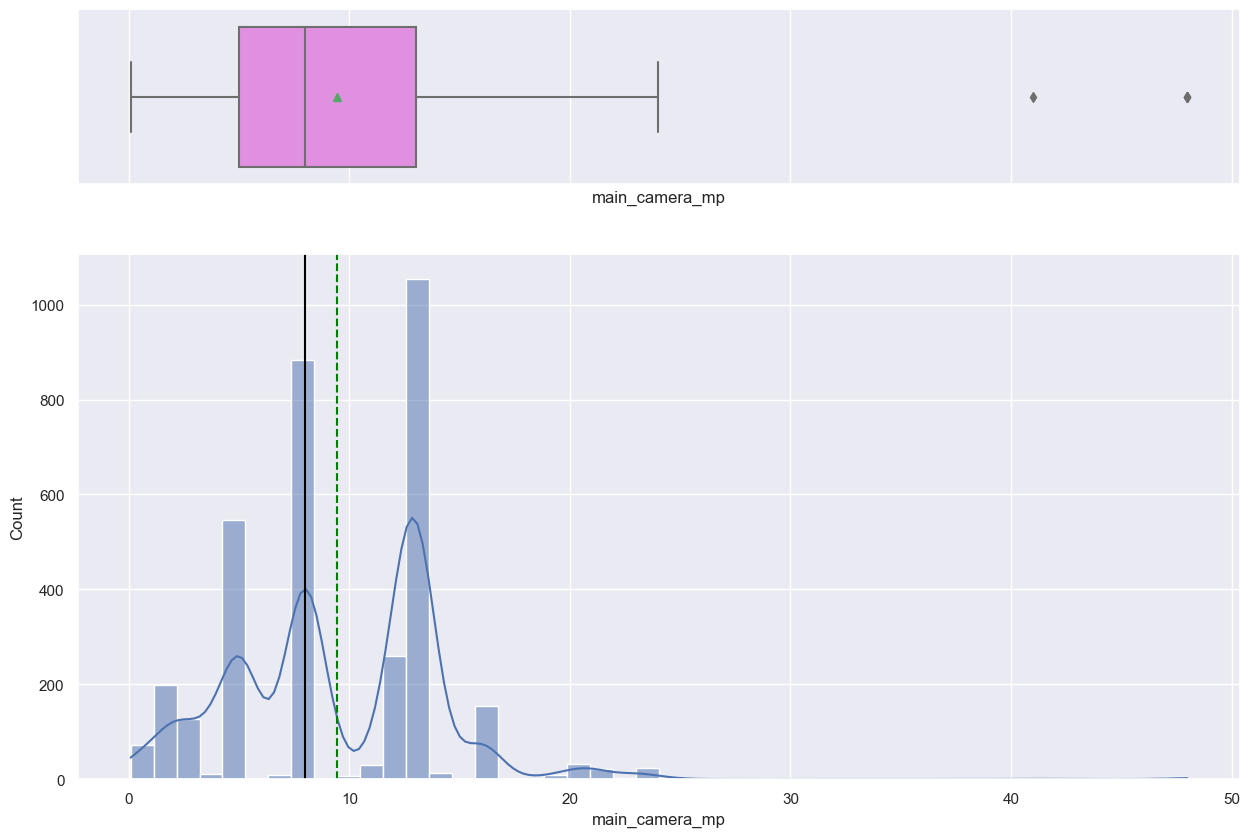

In [24]:
histogram_boxplot(df, 'main_camera_mp', kde=True)

**`selfie_camera_mp`**`

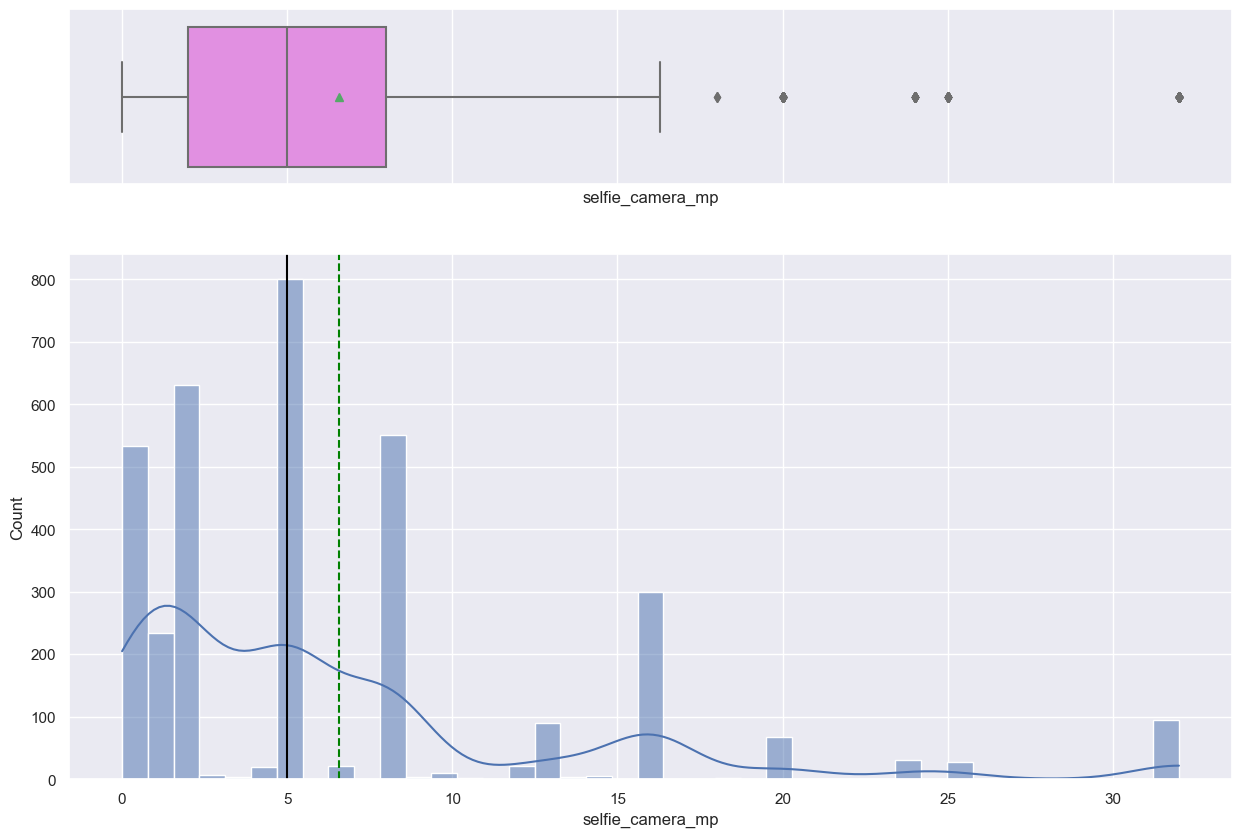

In [25]:
histogram_boxplot(df, 'selfie_camera_mp', kde=True)

**`int_memory`**

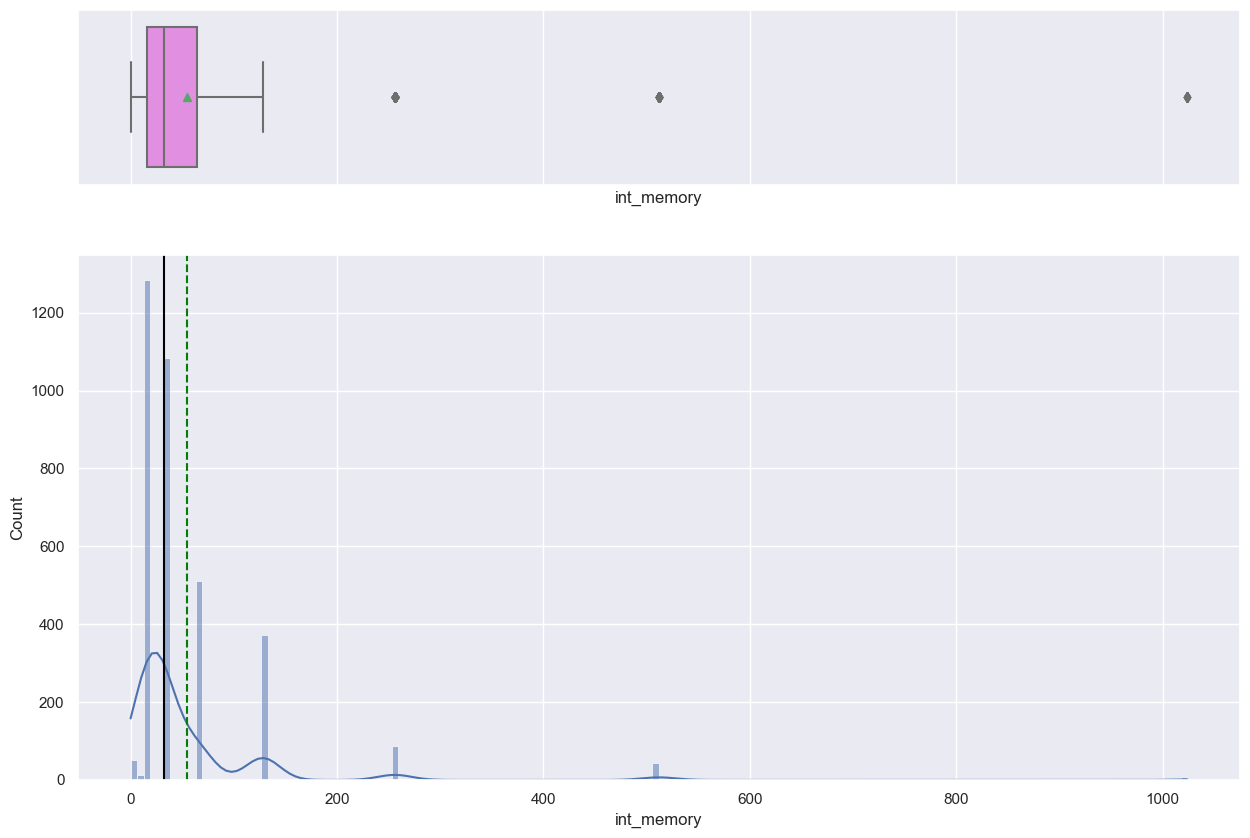

In [26]:
histogram_boxplot(df, 'int_memory', kde=True)

**`ram`**

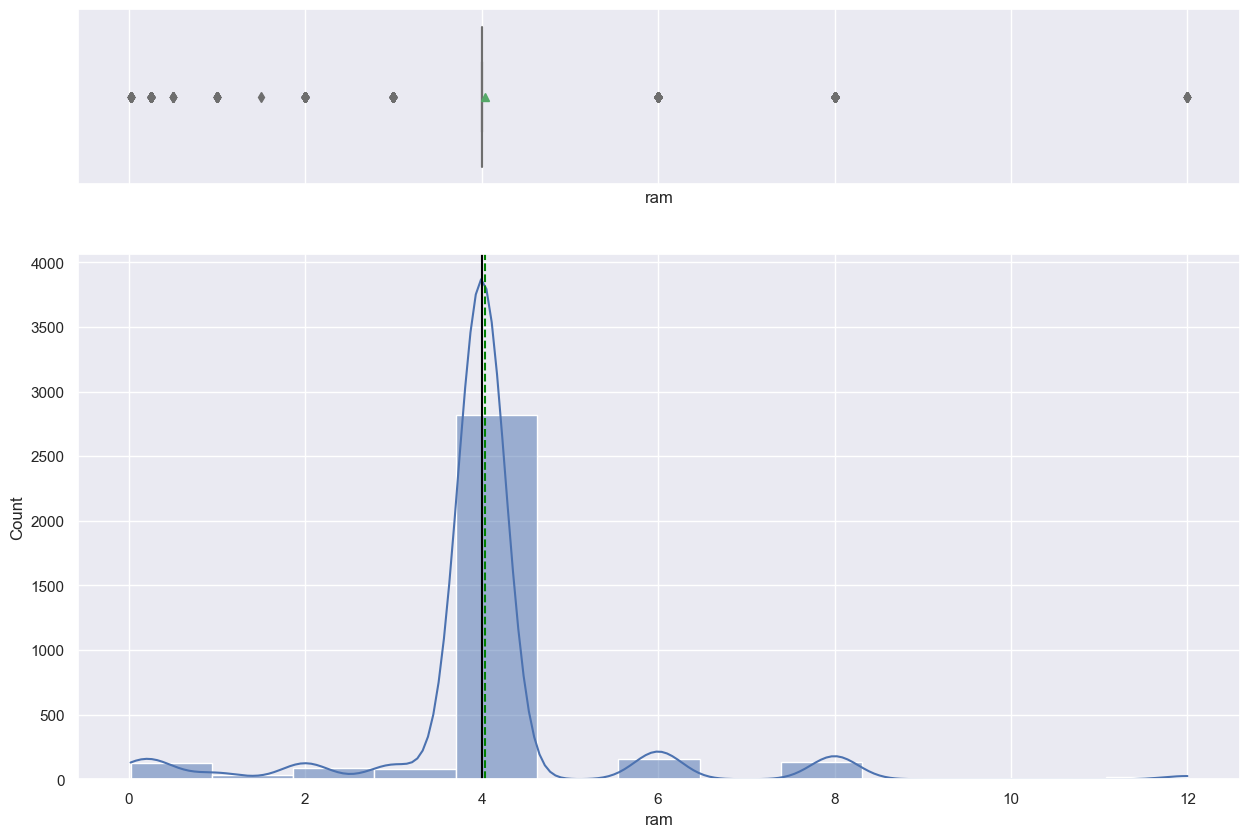

In [27]:
histogram_boxplot(df, 'ram', kde=True)

**`weight`**

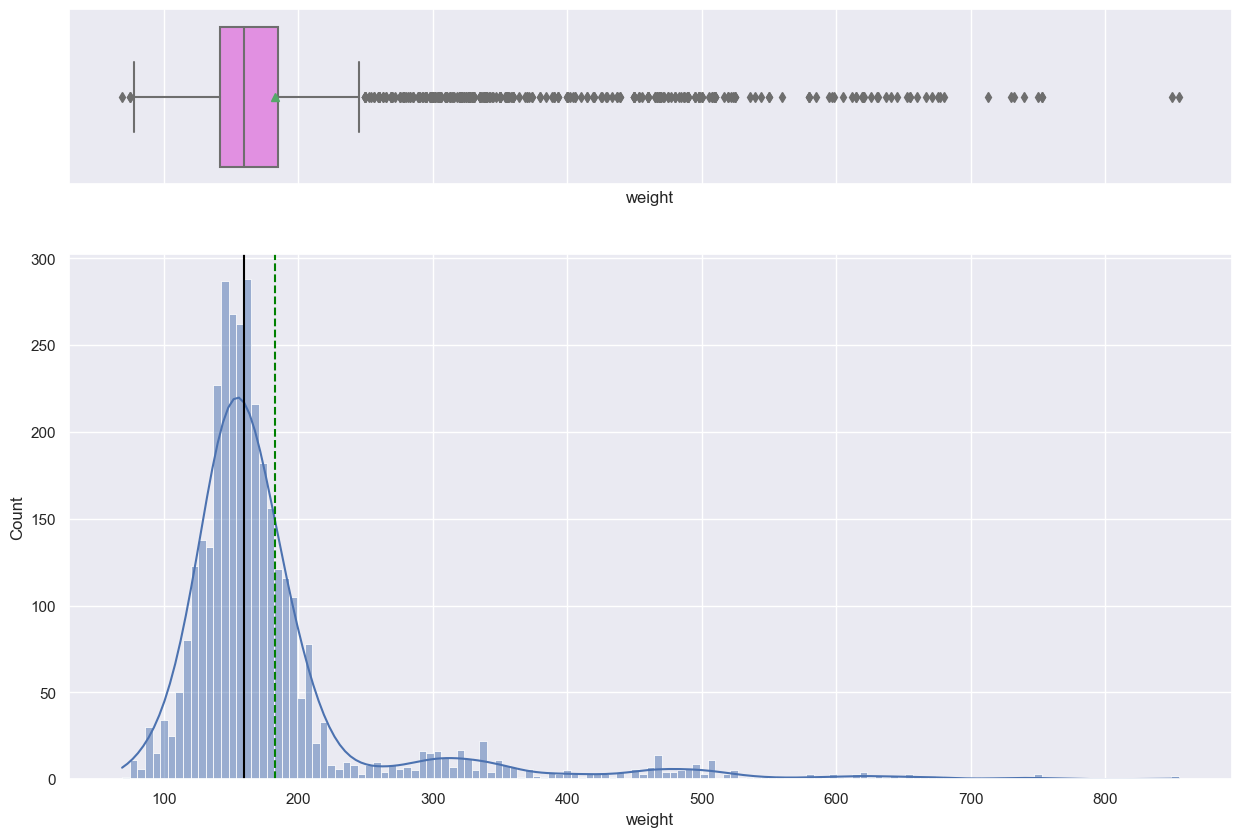

In [28]:
histogram_boxplot(df, 'weight', kde=True)

**`battery`**

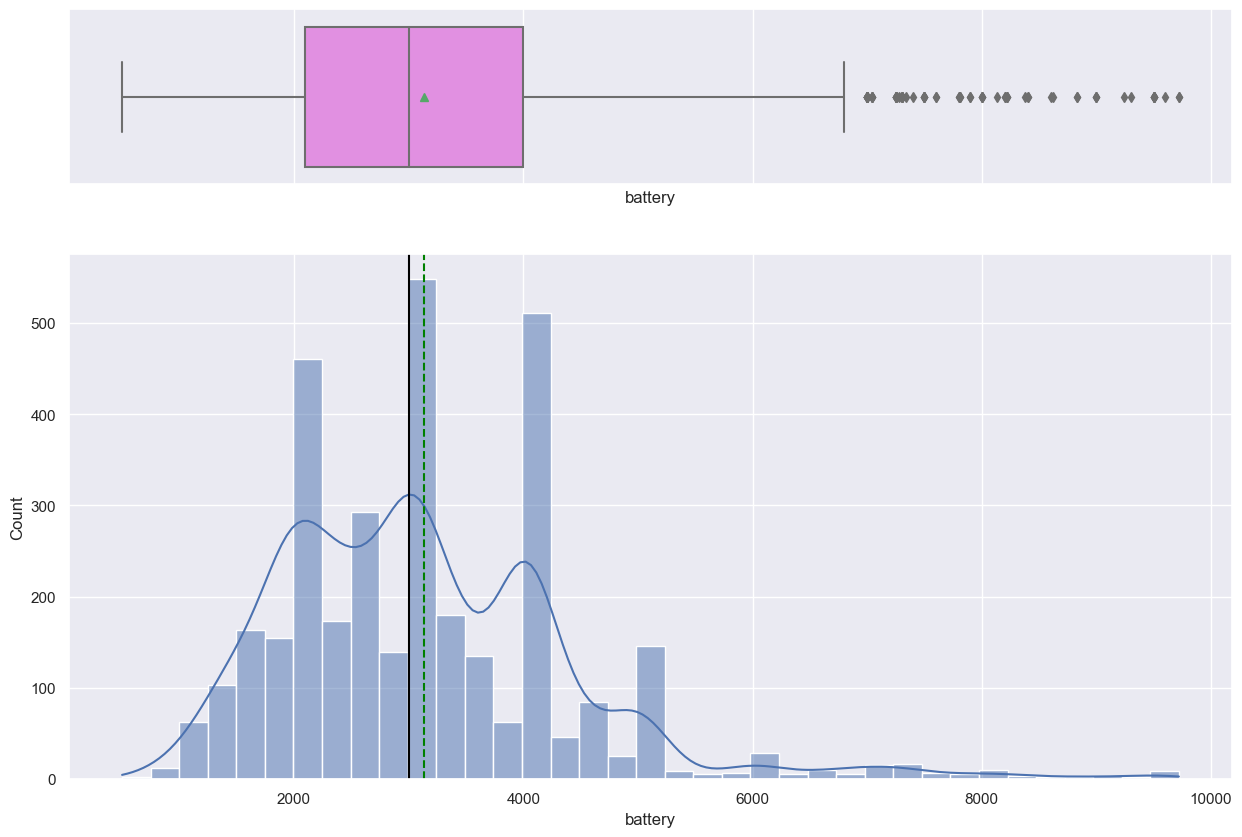

In [29]:
histogram_boxplot(df, 'battery', kde=True)

**`days_used`**

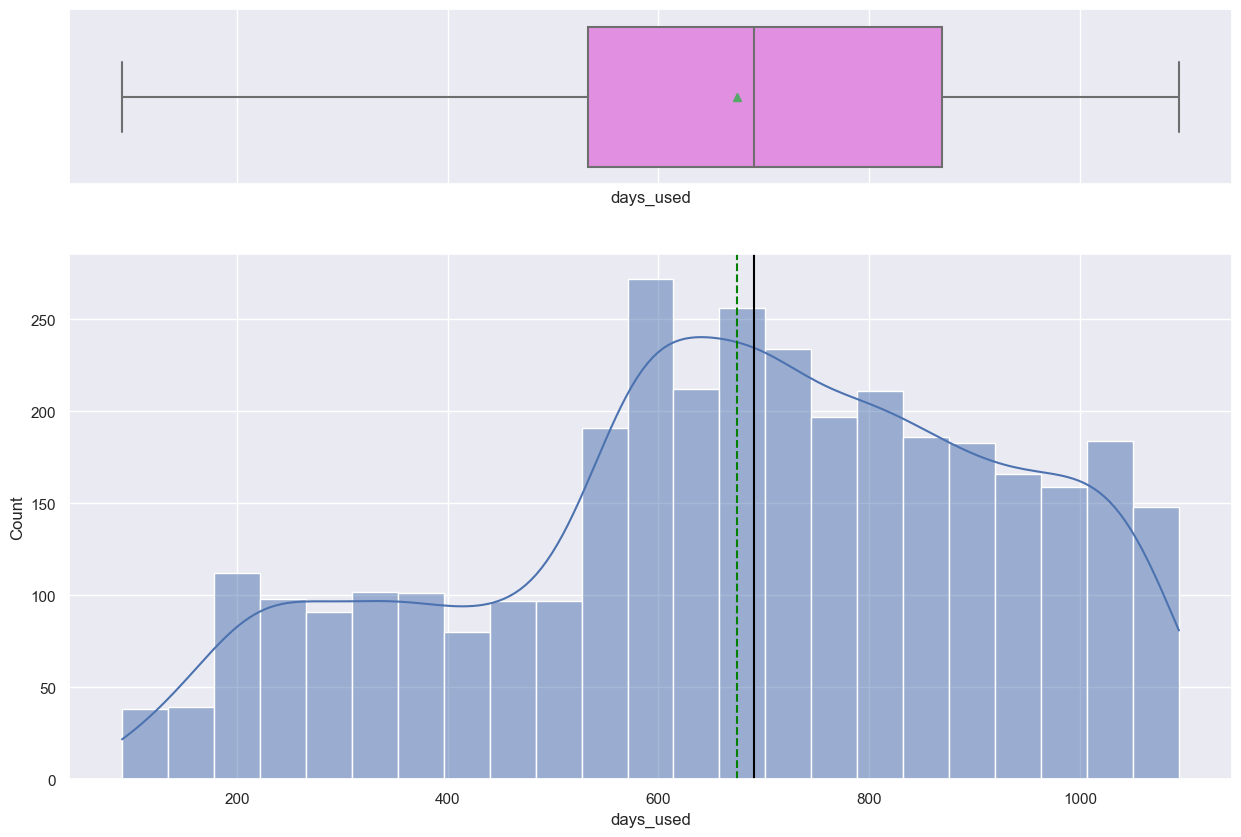

In [30]:
histogram_boxplot(df, 'days_used', kde=True)

**`brand_name`**

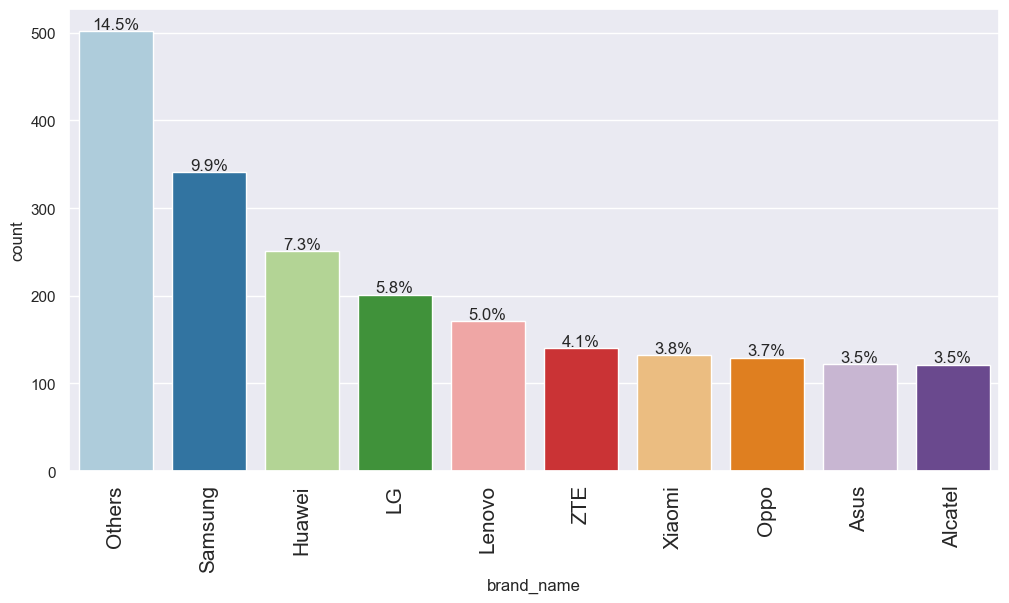

In [31]:
labeled_barplot(df, 'brand_name', perc=True, n=10)

**`os`**

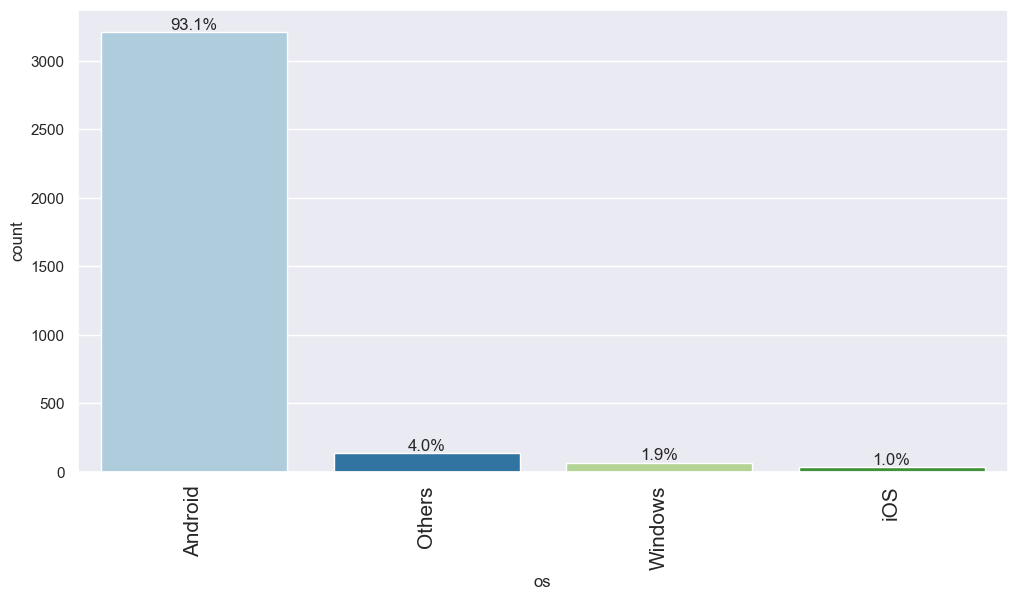

In [32]:
labeled_barplot(df, 'os', perc=True, n=10)

**`4g`**

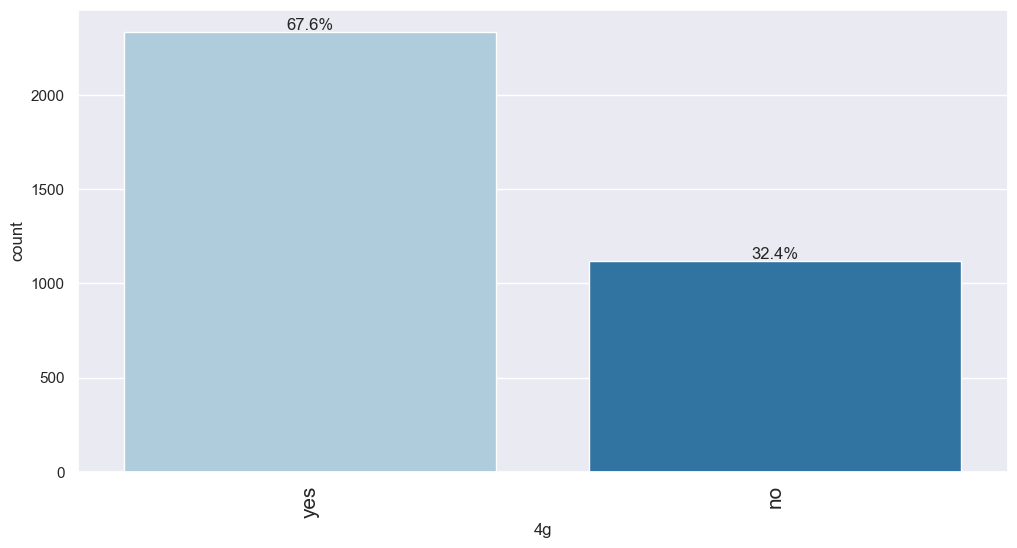

In [33]:
labeled_barplot(df, '4g', perc=True, n=10)

**`5g`**

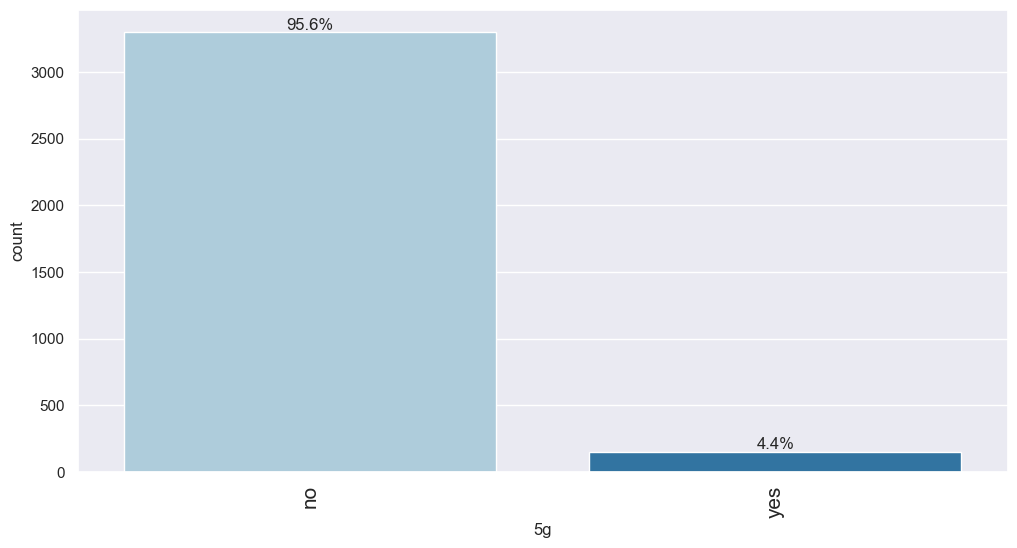

In [34]:
labeled_barplot(df, '5g', perc=True, n=10)

**`release_year`**

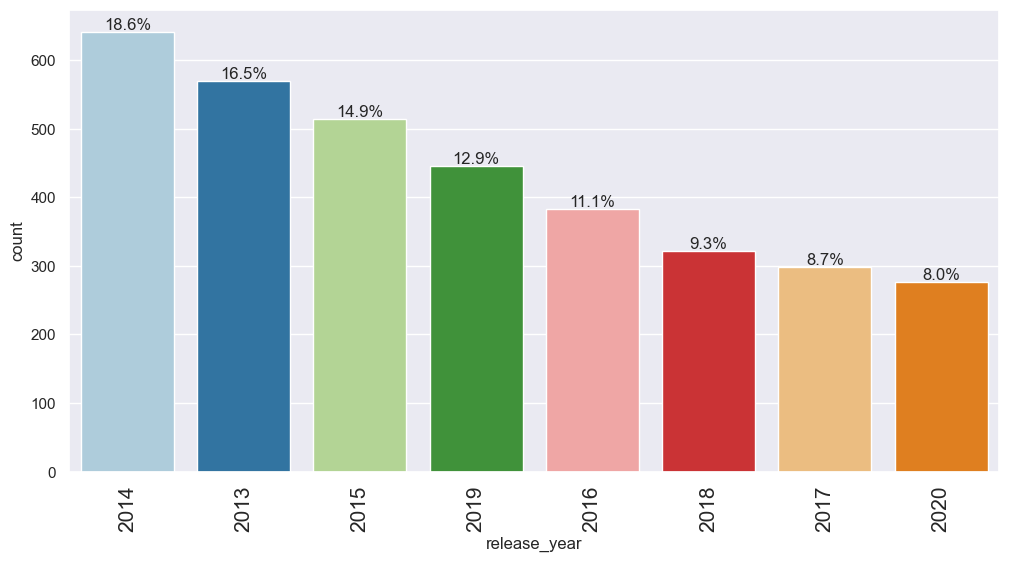

In [35]:
labeled_barplot(data, 'release_year', perc=True, n=10)

### Bivariate Analysis

**Correlation Check**

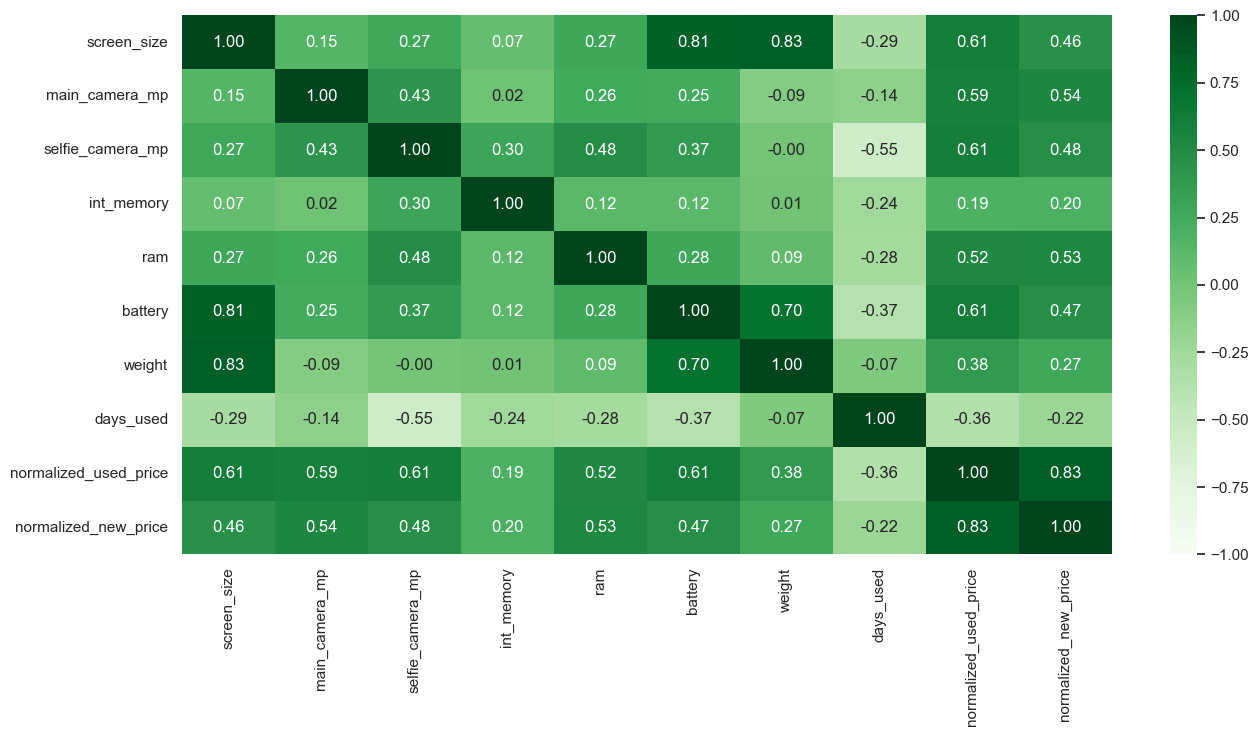

In [36]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
cols_list.remove("release_year")

plt.figure(figsize=(15, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Greens"
)
plt.show()

## Model Building - Linear Regression

**Linear model building**

In [37]:
olsmodel1 = sm.OLS(y, X).fit()
print(olsmodel1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.843
Method:                    Least Squares   F-statistic:                     386.5
Date:                   Sat, 14 Oct 2023   Prob (F-statistic):               0.00
Time:                           00:32:54   Log-Likelihood:                 147.26
No. Observations:                   3454   AIC:                            -196.5
Df Residuals:                       3405   BIC:                             104.7
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


**Observations**

- Negative values of the coefficient show that `normalized_used_price` decreases with the increase of corresponding attribute value 
- Positive values of the coefficient show that `normalized_used_price` increases with the increase of corresponding attribute value 

- p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant
But these variables might contain multicollinearity, which will affect the p-values. So, we need to deal with multicollinearity and check the other assumptions of linear regression first, and then look at the p-values

## Model Performance Check

**Let's check the performance of the model using different metrics.**

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate MAPE and adjusted $R^2$.    
* We will create a function which will print out all the above metrics in one go.

In [38]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [39]:
# checking model performance on train set (seen 70% data)
print("Training Performance...\n")
olsmodel1_train_perf = model_performance_regression(olsmodel1, x_train, y_train)
olsmodel1_train_perf

Training Performance...



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.231352,0.179297,0.846786,0.843614,4.315922


In [40]:
# Predict values for the test set
y_pred = olsmodel1.predict(sm.add_constant(x_test))

# checking model performance on test set (unseen 30% data)
print("Test Performance...\n")
olsmodel1_test_perf = model_performance_regression(olsmodel1, sm.add_constant(x_test), y_test)
olsmodel1_test_perf


Test Performance...



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.233075,0.184576,0.840475,0.832556,4.425935


Observations:
- **Consistent Performance**: The model demonstrates consistent performance between training and test datasets, with RMSE, MAE, and R-squared values being closely aligned. This suggests minimal overfitting and good generalization to new data.

- **High Explanatory Power**: The R-squared and adjusted R-squared values are fairly high (around 0.84 for training and 0.83 for test), indicating that the model accounts for a significant portion of the variance in the dependent variable.

- **Average Error Margin**: The Mean Absolute Percentage Error (MAPE) reveals that the model's predictions, on average, deviate by approximately 4.3-4.4% from the actual values, offering insight into the relative size of the prediction errors.

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

- We will be checking the following Linear Regression assumptions:

    1. **No Multicollinearity**

    2. **Linearity of variables**

    3. **Independence of error terms**

    4. **Normality of error terms**

    5. **No Heteroscedasticity**

### TEST FOR MULTICOLLINEARITY

- We'll evaluate multicollinearity using the Variance Inflation Factor (VIF).

- **General Guidelines**:
    - A VIF of 1 suggests no correlation between the selected predictor and the other predictors.
    - A VIF near or above 5 indicates moderate multicollinearity.
    - When VIF reaches or surpasses 10, it's indicative of significant multicollinearity.

In [41]:
#Let's define a function to check VIF.

def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [42]:
checking_vif(x_train)


,feature,VIF
0,const,234.038410
1,screen_size,8.265095
2,main_camera_mp,2.339367
3,selfie_camera_mp,2.866541
4,int_memory,1.361369
5,ram,2.215712
6,battery,4.021009
7,weight,6.400952
8,days_used,2.589498
9,normalized_new_price,3.243130


### Removing Multicollinearity

To address multicollinearity:

1. Identify each column with a VIF score exceeding 5 and consider it for removal.
2. Assess the impact on adjusted R-squared and RMSE by creating models excluding each of these columns one at a time.
3. Omit the variable that has the smallest effect on the adjusted R-squared value.
4. Re-evaluate the VIF scores for the revised set of predictors.
5. Persist in this iterative process until all VIF scores are below 5.

Now, let's craft a function to facilitate this procedure.

In [43]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [44]:
# Columns with VIF > 5 indicating potential multicollinearity.
col_list = ['const', 'screen_size', 'weight', 'years_since_release', 
            'brand_name_Apple', 'brand_name_Huawei', 'brand_name_LG', 
            'brand_name_Others', 'brand_name_Samsung', 'os_iOS']

# Assess the effect of dropping each high-VIF column on model performance.
res = treating_multicollinearity(x_train, y_train, col_list)

# Display results.
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,const,0.996744,0.251171
1,os_iOS,0.845046,0.232711
2,brand_name_Apple,0.845039,0.232715
3,brand_name_LG,0.844923,0.232802
4,brand_name_Huawei,0.844919,0.232806
5,brand_name_Samsung,0.844916,0.232808
6,brand_name_Others,0.844886,0.232830
7,years_since_release,0.842878,0.234333
8,weight,0.842810,0.234383
9,screen_size,0.840603,0.236023


In [45]:
col_to_drop = 'os_iOS'  ## Specifying the column to drop based on the provided results
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)] ## Dropping the specified column from the train data
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)] ## Dropping the specified column from the test data

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif


VIF after dropping  os_iOS


,feature,VIF
0,const,232.688349
1,screen_size,8.178725
2,main_camera_mp,2.336058
3,selfie_camera_mp,2.854295
4,int_memory,1.361355
5,ram,2.201937
6,battery,4.016620
7,weight,6.375707
8,days_used,2.589021
9,normalized_new_price,3.243019


### Dropping high p-value variables

- We'll remove predictor variables with a p-value exceeding 0.05 since they don't offer significant contributions to predicting the target.
- Notably, p-values might fluctuate after eliminating a particular variable. So, a sequential, rather than simultaneous removal is advisable.
- Here's our approach:
    - Construct a model and assess the p-values of its variables. If any exceed the threshold, drop the one with the highest p-value.
    - Rebuild the model without this variable. Again, inspect the p-values and remove the top offender.
    - This cycle repeats until all remaining variables have p-values below 0.05.

This procedure can be executed manually, by identifying and removing the least significant variable, then recalibrating the model. However, automating this process using a loop can expedite the procedure and minimize manual effort.

In [46]:
# initial list of columns
predictors = x_train2.copy() 
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram', 'weight', 'normalized_new_price', 'years_since_release', 'brand_name_Celkon', 'brand_name_Xiaomi', 'os_Others', '4g_yes']


In [47]:
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]

In [48]:
olsmod2 = sm.OLS(y_train, x_train3).fit()
print(olsmod2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.846
Model:                               OLS   Adj. R-squared:                  0.845
Method:                    Least Squares   F-statistic:                     1097.
Date:                   Sat, 14 Oct 2023   Prob (F-statistic):               0.00
Time:                           00:32:56   Log-Likelihood:                 98.911
No. Observations:                   2417   AIC:                            -171.8
Df Residuals:                       2404   BIC:                            -96.55
Df Model:                             12                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

**Observations**

* Now adjusted R-squared is 0.845, i.e., our model is able to explain ~84.5% of the variance. This shows that the model is good
* The adjusted R-squared in *olsmod1* (where we considered all the variables) was also 0.843. This shows that the variables we dropped were not affecting the model much

### TEST FOR LINEARITY AND INDEPENDENCE

- We'll assess linearity and independence by plotting residuals against fitted values and observing for any discernible patterns.
- A lack of distinct patterns indicates a linear model and independent residuals.
- Conversely, noticeable patterns hint at non-linearity in the model and dependent residuals.

In [49]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
1744,4.261975,4.311956,-0.049980
3141,4.175156,3.858941,0.316215
1233,4.117410,4.430265,-0.312855
3046,3.782597,3.852046,-0.069448
2649,3.981922,3.917175,0.064747


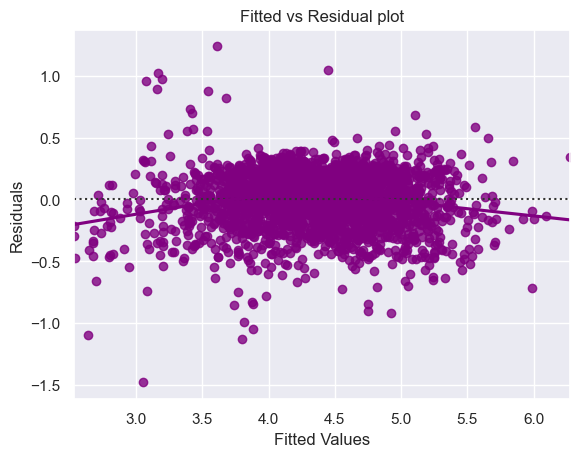

In [50]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

### TEST FOR NORMALITY

- We will test for normality by checking the distribution of residuals, by checking the Q-Q plot of residuals, and by using the Shapiro-Wilk test.
- If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
- If the p-value of the Shapiro-Wilk test is greater than 0.05, we can say the residuals are normally distributed.

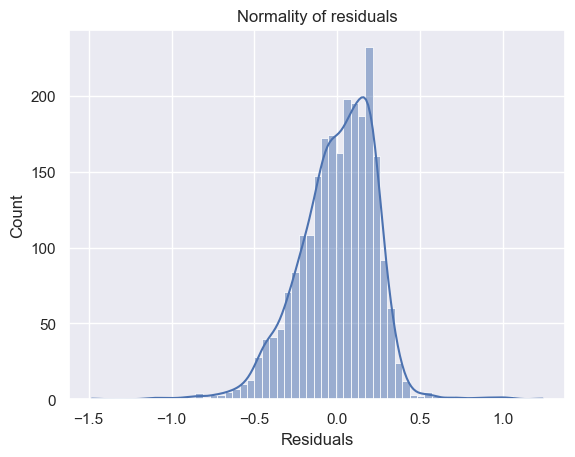

In [51]:
# This is to check the assumption of normality of residuals in regression analysis.
sns.histplot(data=df_pred, x='Residuals', kde=True)

# Adding a title to the plot for better clarity and presentation.
plt.title("Normality of residuals")

# Displaying the plot.
plt.show()


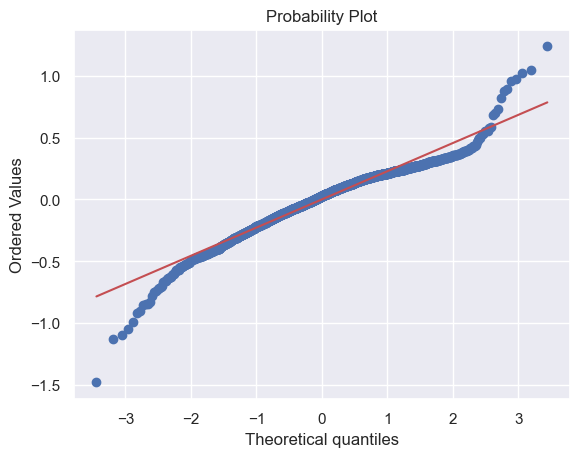

In [52]:
import pylab
import scipy.stats as stats

# Using the probplot (Q-Q plot) function from scipy's stats module to visualize how the 
# data fits to a normal distribution. This is another way to check the assumption of 
# normality of residuals in regression analysis.
stats.probplot(df_pred['Residuals'], dist="norm", plot=pylab)

# Displaying the Q-Q plot.
plt.show()


- The residuals more or less follow a straight line except for the tails
- Let's check the results of the Shapiro-Wilk test

In [53]:
# Using Shapiro-Wilk to test normality of residuals.
W_statistic, p_value = stats.shapiro(df_pred['Residuals'])

# Display results.
print(f"W-statistic: {W_statistic}, P-value: {p_value}")

# Interpret p-value.
print("Residuals are" + (" not" if p_value <= 0.05 else "") + " normally distributed.")


W-statistic: 0.9629457592964172, P-value: 2.0437419818470153e-24
Residuals are not normally distributed.


- The Shapiro-Wilk test yields a p-value less than 0.05, indicating the residuals aren't perfectly normal.
- Yet, the distribution is approximately close to normal.
- Thus, we can consider the assumption as reasonably met.

### TEST FOR HOMOSCEDASTICITY

- We will test for homoscedasticity by using the goldfeldquandt test.
- If we get a p-value greater than 0.05, we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.

In [54]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3)
lzip(name, test)

[('F statistic', 0.9336781129802235), ('p-value', 0.8821859935532923)]

Observation: Given the p-value exceeds 0.05, the residuals appear to exhibit homoscedasticity, thus fulfilling this assumption.

## Final Model

In [55]:
# predictions on the test set
pred = olsmod2.predict(x_test3)

df_pred_test = pd.DataFrame({"Actual": y_test**(3), "Predicted": pred**(3)})
print("Sample of Actual and Predicted used_price by the ML model (in €)")
df_pred_test.sample(10, random_state=42)

Sample of Actual and Predicted used_price by the ML model (in €)


,Actual,Predicted
1041,125.563122,106.767197
3161,60.673899,79.634324
471,105.280149,90.597511
718,81.910252,98.519471
927,57.205561,51.724197
1042,52.564476,53.153510
2126,113.546853,109.979974
1192,61.552906,61.022738
2247,81.238798,68.735540
7,105.784970,96.569673


- The model demonstrates commendable prediction capabilities, with actual and predicted values (used_price) being closely aligned. However, there remains room for enhancement.

- This comparison can also be illustrated through a bar chart.

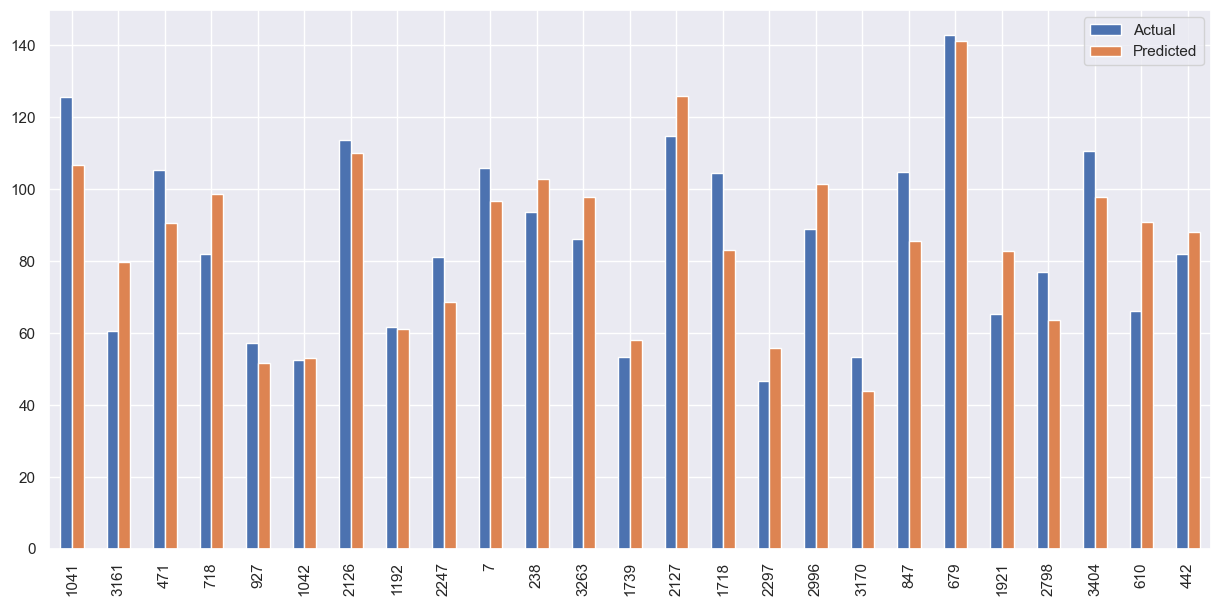

In [56]:
df_ = df_pred_test.sample(25, random_state=42)
df_.plot(kind="bar", figsize=(15, 7))
plt.show()

In [57]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, x_train3, y_train)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.232268,0.180326,0.84557,0.844734,4.346177


In [58]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, x_test3, y_test)
olsmod2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.237545,0.188292,0.834299,0.832193,4.510054


- The model proficiently accounts for approximately 83% of the data's variability, indicating strong predictive power.

- Both training and testing RMSE and MAE values are impressively low and closely matched, signaling no overfitting in the model.

- The MAPE for the test set denotes a prediction accuracy within 4.5% of the normalized_used_price.

- Thus, the olsmod2 model stands out as effective for both prediction and inferential tasks

## Actionable Insights and Recommendations 

**Key Model Insights:**

- Brand Impact: The brand of a phone plays a significant role in determining its price, with "Others" being the most common. Consider leveraging this insight to strategize branding and market positioning for refurbished phones.

- Operating System Dominance: Android OS dominates the dataset, suggesting a strong preference among customers. Focus on optimizing and marketing Android-based refurbished phones.

- Network Technology: The dataset predominantly includes phones with 4G capabilities. While 5G is marginally contributing positively to prices, maintain competitive pricing for 4G models.

- Screen Size and Camera Quality: Larger screen sizes and better camera specifications (main and selfie) are associated with higher prices. Emphasize these features in marketing and product descriptions.

- Memory and RAM: Internal memory and RAM configurations have limited impact on prices but contribute to user satisfaction. Ensure these specifications meet customer expectations.

- Release Year: Recognize that the dataset primarily covers phones released around 2015. Consider targeted marketing strategies for these vintage models to attract collectors and enthusiasts.

**Actionable Recommendations:**

- Brand Strategy: Capitalize on the presence of 34 unique brands, focusing on strategic branding to differentiate refurbished phones in the market.

- Operating System Optimization: Leverage the popularity of Android OS by optimizing the performance and user experience of Android-based refurbished phones.

- Network Technology: Market 5G-enabled phones as cutting-edge options, while maintaining competitive pricing for 4G models.

- Screen Size and Camera: Highlight phones with larger screens and superior camera specifications in product descriptions and marketing materials.

- Memory and RAM: Optimize internal memory and RAM configurations to enhance user satisfaction, even though these attributes have limited impact on prices.

- Release Year Marketing: Implement nostalgia-driven marketing campaigns for vintage phone models, targeting collectors and enthusiasts.

- Pricing Strategy: Utilize the model's insights on coefficient values to set competitive prices. Increase prices for attributes with positive coefficients and consider competitive pricing for attributes with negative coefficients.

- Performance Monitoring: Continuously monitor model performance metrics such as RMSE, MAE, and MAPE to ensure accurate pricing predictions. Adjust pricing strategies based on model performance.

- Assumption Validation: While the model performs well despite minor deviations from assumptions of normality and homoscedasticity, continue to validate these assumptions and explore alternative modeling approaches for potential improvements.

These recommendations aim to assist in product positioning, pricing, and marketing strategies for the refurbished phone business, leveraging the model insights and performance metrics to optimize decision-making.


___